# FSW Payoff landscape

In [1]:
import gym

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 

from lcs import Perception
from lcs.agents import EnvironmentAdapter
from lcs.metrics import population_metrics

import lcs.agents.acs2 as acs2
import lcs.agents.aacs2 as aacs2
import lcs.agents.acs2ar as acs2ar

import random
from collections import namedtuple

# Logger
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
import gym_fsw
fsw5 = gym.make('fsw-5-v0')
fsw10 = gym.make('fsw-10-v0')

class FSWAdapter(EnvironmentAdapter):
    @staticmethod
    def to_genotype(phenotype):
        return phenotype,

In [3]:
# SET THE ENVIRONMENT
env = fsw5

state_to_actions = env._state_action()
state_to_actions

{'0': [0, 1],
 '1': [0, 1],
 '2': [0, 1],
 '3': [0, 1],
 '4': [0, 1],
 '5': [0, 1],
 '6': [0, 1],
 '7': [0, 1],
 '8': [0, 1],
 '9': [0, 1],
 '10': []}

In [4]:
StateAction = namedtuple('StateAction', 'id state action')

state_action = []

idx = 1
for state, actions in state_to_actions.items():
    if len(actions) > 0:
        for action in actions:
            state_action.append(StateAction(idx, state, action))
            idx += 1
            
state_action

[StateAction(id=1, state='0', action=0),
 StateAction(id=2, state='0', action=1),
 StateAction(id=3, state='1', action=0),
 StateAction(id=4, state='1', action=1),
 StateAction(id=5, state='2', action=0),
 StateAction(id=6, state='2', action=1),
 StateAction(id=7, state='3', action=0),
 StateAction(id=8, state='3', action=1),
 StateAction(id=9, state='4', action=0),
 StateAction(id=10, state='4', action=1),
 StateAction(id=11, state='5', action=0),
 StateAction(id=12, state='5', action=1),
 StateAction(id=13, state='6', action=0),
 StateAction(id=14, state='6', action=1),
 StateAction(id=15, state='7', action=0),
 StateAction(id=16, state='7', action=1),
 StateAction(id=17, state='8', action=0),
 StateAction(id=18, state='8', action=1),
 StateAction(id=19, state='9', action=0),
 StateAction(id=20, state='9', action=1)]

## Agent estimations

In [5]:
learning_rate = 0.1
discount_factor = 0.95
epsilon = 0.1
zeta = 0.0001

In [6]:
%%time

acs2_cfg = acs2.Configuration(1, 2,
                         do_ga=False,
                         beta=learning_rate,
                         epsilon=1-epsilon,
                         gamma=discount_factor,
                         environment_adapter=FSWAdapter,
                         biased_exploration_prob=0.8)


acs2_agent = acs2.ACS2(acs2_cfg)
acs2_population, _ = acs2_agent.explore(env, 2500)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 8, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 8, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 9, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 750, 'steps_in_trial': 9, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 9, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 1250, 'steps_in_trial': 7, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 1500, 'steps_in_trial': 9, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 1750, 'steps_in_trial': 6, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 5, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 2250, 'steps_in_trial': 6, 'reward': 100}


CPU times: user 2.32 s, sys: 24.6 ms, total: 2.35 s
Wall time: 2.47 s


In [7]:
%%time

aacs2_cfg = aacs2.Configuration(1, 2,
                         do_ga=False,
                         beta=learning_rate,
                         epsilon=1-epsilon,
                         gamma=discount_factor,
                         environment_adapter=FSWAdapter,
                         biased_exploration_prob=0.8)


aacs2_agent = aacs2.AACS2(aacs2_cfg)
aacs2_population, _ = aacs2_agent.explore_exploit(env, 5000)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 9, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 7, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 5, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 1500, 'steps_in_trial': 6, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 7, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 2500, 'steps_in_trial': 8, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 3000, 'steps_in_trial': 10, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 3500, 'steps_in_trial': 6, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 4000, 'steps_in_trial': 9, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 4500, 'steps_in_trial': 7, 'reward': 100}


CPU times: user 3.64 s, sys: 32.6 ms, total: 3.67 s
Wall time: 3.78 s


In [8]:
%%time

acs2ar_cfg = acs2ar.Configuration(1, 2,
                         do_ga=False,
                         beta=learning_rate,
                         epsilon=1-epsilon,
                         gamma=discount_factor,
                         zeta=zeta,
                         environment_adapter=FSWAdapter,
                         biased_exploration_prob=0.8)


acs2ar_agent = acs2ar.ACS2AR(acs2ar_cfg)
acs2ar_population, _ = acs2ar_agent.explore_exploit(env, 5000)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 8, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 6, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 6, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 1500, 'steps_in_trial': 8, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 5, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 2500, 'steps_in_trial': 5, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 3000, 'steps_in_trial': 7, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 3500, 'steps_in_trial': 7, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 4000, 'steps_in_trial': 6, 'reward': 100}
INFO:lcs.agents.Agent:{'trial': 4500, 'steps_in_trial': 8, 'reward': 100}


CPU times: user 3.74 s, sys: 30.4 ms, total: 3.77 s
Wall time: 3.85 s


In [9]:
%%time

# q-learning

Q = np.zeros((env.observation_space.n, env.action_space.n))
episodes = 10000

for i in range(1, episodes):
    state = int(env.reset())
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
            
        next_state, reward, done, info = env.step(action)
        next_state = int(next_state)
                
        Q[state, action] = Q[state, action] + learning_rate * (reward + discount_factor * np.max(Q[next_state, :]) - Q[state, action])
        
        state = next_state

Q

CPU times: user 760 ms, sys: 17.9 ms, total: 778 ms
Wall time: 786 ms


array([[ 81.450625  ,  77.37809375],
       [ 81.450625  ,  85.7375    ],
       [ 90.25      ,  85.7375    ],
       [ 90.25      ,  95.        ],
       [100.        ,  95.        ],
       [ 64.49458586,  81.450625  ],
       [ 85.25658077,  85.7375    ],
       [ 83.77097066,  90.25      ],
       [ 95.        ,  94.70966783],
       [100.        ,  96.18479576],
       [  0.        ,   0.        ]])

Because R-Learning is unstable it will be performed multiple times and then averaged

In [10]:
%%time

learning_rate = 0.1

def rlearning(env, episodes=5000):
    R = np.zeros((env.observation_space.n, env.action_space.n))
    rho = 0

    for i in range(1, episodes):
        state = int(env.reset())
        was_greedy = False
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(R[state, :])
                was_greedy = True

            next_state, reward, done, info = env.step(action)
            next_state = int(next_state)

            R[state, action] = R[state, action] + learning_rate * (reward - rho + np.max(R[next_state, :]) - R[state, action])

            if was_greedy:
                rho = rho + zeta * (reward + np.max(R[next_state, :]) - np.max(R[state, :]) - rho)

            state = next_state 
    
    return R, rho

def avg(matrices):
    X = sum(matrices)
    X /= len(matrices)
    return X

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.78 µs


In [11]:
# perform r-learning
experiments = 10
Rs = []
rhos = []

for i in range(0, experiments):
    print(f"Performing experiment {i}")
    R, rho = rlearning(env)
    
    Rs.append(R)
    rhos.append(rho)
    
R = avg(Rs)
rho = np.mean(rhos)

print(f"\nRho: {rho}\n")
print(R)

Performing experiment 0
Performing experiment 1
Performing experiment 2
Performing experiment 3
Performing experiment 4
Performing experiment 5
Performing experiment 6
Performing experiment 7
Performing experiment 8
Performing experiment 9

Rho: 0.473655549746138

[[97.63043307 97.1355407 ]
 [97.61395186 98.10453042]
 [98.57854878 98.09228913]
 [98.56922817 99.05245117]
 [99.52626245 99.04739863]
 [79.14970398 82.00135494]
 [89.92437659 74.94878085]
 [78.98537561 91.10282838]
 [99.04856474 78.68058702]
 [93.86954566 73.68548463]
 [ 0.          0.        ]]


## PAYOFF LANDSCAPE

For each state-action determine the reward reward

In [12]:
payoffs = {}

for sa in state_action:
    p = Perception((sa.state,))
    
    # ACS2
    acs2_match_set = acs2_population.form_match_set(p)
    acs2_action_set = acs2_match_set.form_action_set(sa.action)
    
    # AACS2
    aacs2_match_set = aacs2_population.form_match_set(p)
    aacs2_action_set = aacs2_match_set.form_action_set(sa.action)
    
    # ACS2AR
    acs2ar_match_set = acs2ar_population.form_match_set(p)
    acs2ar_action_set = acs2ar_match_set.form_action_set(sa.action)
    
    payoffs[sa] = {
        'acs2': np.mean(list(map(lambda cl: cl.r, acs2_action_set))),
        'aacs2': np.mean(list(map(lambda cl: cl.r, aacs2_action_set))),
        'acs2ar': np.mean(list(map(lambda cl: cl.r, acs2ar_action_set))),
        'q-learning': Q[int(sa.state), sa.action],
        'r-learning': R[int(sa.state), sa.action]
    }

## Plot results

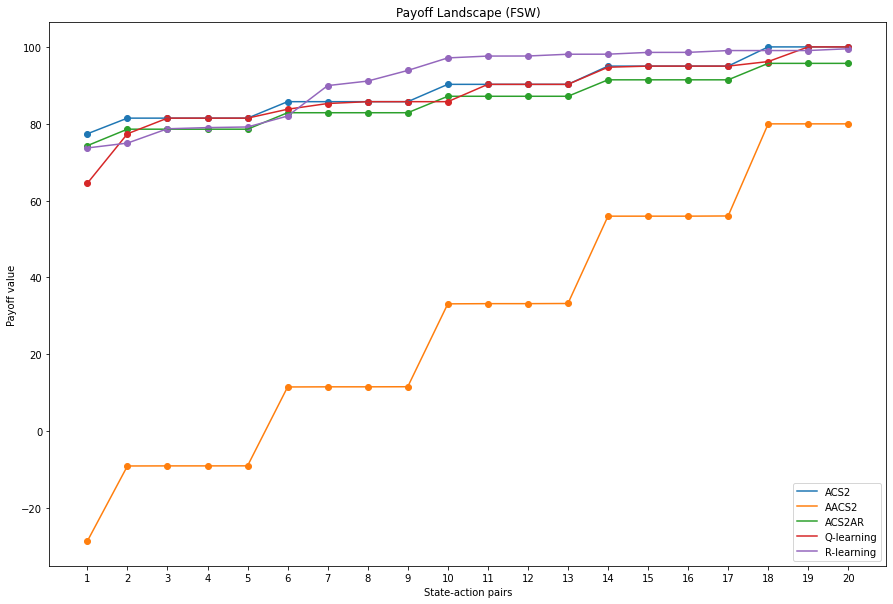

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))

x = range(1, len(payoffs)+1)
y_acs2 = sorted([v['acs2'] for k, v in payoffs.items()])
y_aacs2 = sorted([v['aacs2'] for k, v in payoffs.items()])
y_acs2ar = sorted([v['acs2ar'] for k, v in payoffs.items()])
y_qlearning = sorted([v['q-learning'] for k, v in payoffs.items()])
y_rlearning = sorted([v['r-learning'] for k, v in payoffs.items()])

# ACS2
plt.scatter(x, y_acs2)
plt.plot(x, y_acs2, label='ACS2')

# AACS2
plt.scatter(x, y_aacs2)
plt.plot(x, y_aacs2, label='AACS2')

# ACS2AR
plt.scatter(x, y_acs2ar)
plt.plot(x, y_acs2ar, label='ACS2AR')

# Q-learning
plt.scatter(x, y_qlearning)
plt.plot(x, y_qlearning, label='Q-learning')

# R-learning
plt.scatter(x, y_rlearning)
plt.plot(x, y_rlearning, label='R-learning')

ax.xaxis.set_major_locator(MultipleLocator(1)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%1.0f')) 

ax.set_xlabel("State-action pairs")
ax.set_ylabel("Payoff value")
ax.set_title("Payoff Landscape (FSW)")

ax.legend(loc='lower right')

plt.show()